In [433]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [434]:
fpath = "Data/london_weather_MODIFIED - london_weather_MODIFIED.csv"

In [435]:
df = pd.read_csv(fpath)

In [436]:
df.head()

,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
0,19790101,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0
1,19790102,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0
2,19790103,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0
3,19790104,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0
4,19790105,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0


In [437]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15341 entries, 0 to 15340
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date              15341 non-null  int64  
 1   cloud_cover       14938 non-null  float64
 2   sunshine          14957 non-null  float64
 3   global_radiation  14939 non-null  float64
 4   max_temp          14951 non-null  float64
 5   mean_temp         14922 non-null  float64
 6   min_temp          14955 non-null  float64
 7   precipitation     14951 non-null  float64
 8   pressure          14953 non-null  float64
 9   snow_depth        13589 non-null  float64
dtypes: float64(9), int64(1)
memory usage: 1.2 MB


In [438]:
df['date_format'] = pd.to_datetime(df['date'], format='%Y%m%d')

In [439]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15341 entries, 0 to 15340
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   date              15341 non-null  int64         
 1   cloud_cover       14938 non-null  float64       
 2   sunshine          14957 non-null  float64       
 3   global_radiation  14939 non-null  float64       
 4   max_temp          14951 non-null  float64       
 5   mean_temp         14922 non-null  float64       
 6   min_temp          14955 non-null  float64       
 7   precipitation     14951 non-null  float64       
 8   pressure          14953 non-null  float64       
 9   snow_depth        13589 non-null  float64       
 10  date_format       15341 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(9), int64(1)
memory usage: 1.3 MB


In [440]:
df = df.drop(columns=['date'])

In [441]:
df = df.set_index('date_format')

In [442]:
df.head()

,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
date_format,,,,,,,,,
1979-01-01,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0
1979-01-02,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0
1979-01-03,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0
1979-01-04,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0
1979-01-05,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0


In [443]:
df = df.loc['2000':,['precipitation','mean_temp','min_temp',
                            'max_temp','snow_depth',]]
df.head()

,precipitation,mean_temp,min_temp,max_temp,snow_depth
date_format,,,,,
2000-01-01,0.0,7.0,4.9,10.8,0.0
2000-01-02,0.2,7.9,5.0,11.5,0.0
2000-01-03,6.0,9.4,7.2,9.5,0.0
2000-01-04,0.2,7.0,4.4,11.0,0.0
2000-01-05,0.8,6.4,1.9,10.8,0.0


In [444]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7671 entries, 2000-01-01 to 2020-12-31
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   precipitation  7281 non-null   float64
 1   mean_temp      7252 non-null   float64
 2   min_temp       7285 non-null   float64
 3   max_temp       7281 non-null   float64
 4   snow_depth     5919 non-null   float64
dtypes: float64(5)
memory usage: 359.6 KB


In [445]:
df.isna().sum()

precipitation     390
mean_temp         419
min_temp          386
max_temp          390
snow_depth       1752
dtype: int64

In [446]:
df['min_temp'] = df['min_temp'].fillna(method='ffill')

In [447]:
df['max_temp'] = df['max_temp'].fillna(method='bfill')

In [448]:
df['precipitation'] = df['precipitation'].interpolate()

In [449]:
df['snow_depth'] = df['snow_depth'].fillna(method='ffill')

In [450]:
df['mean_temp'] = df['mean_temp'].interpolate()

In [451]:
df.isna().sum() /len(df) * 100

precipitation    0.0
mean_temp        0.0
min_temp         0.0
max_temp         0.0
snow_depth       0.0
dtype: float64

In [452]:
q1 = df['precipitation'].copy()
q1

date_format
2000-01-01    0.0
2000-01-02    0.2
2000-01-03    6.0
2000-01-04    0.2
2000-01-05    0.8
             ... 
2020-12-27    2.0
2020-12-28    0.2
2020-12-29    0.0
2020-12-30    0.0
2020-12-31    0.0
Name: precipitation, Length: 7671, dtype: float64

In [453]:
q1.info()

<class 'pandas.core.series.Series'>
DatetimeIndex: 7671 entries, 2000-01-01 to 2020-12-31
Series name: precipitation
Non-Null Count  Dtype  
--------------  -----  
7671 non-null   float64
dtypes: float64(1)
memory usage: 119.9 KB


In [454]:
q1.index

DatetimeIndex(['2000-01-01', '2000-01-02', '2000-01-03', '2000-01-04',
               '2000-01-05', '2000-01-06', '2000-01-07', '2000-01-08',
               '2000-01-09', '2000-01-10',
               ...
               '2020-12-22', '2020-12-23', '2020-12-24', '2020-12-25',
               '2020-12-26', '2020-12-27', '2020-12-28', '2020-12-29',
               '2020-12-30', '2020-12-31'],
              dtype='datetime64[ns]', name='date_format', length=7671, freq=None)

In [455]:
q1 = q1.asfreq('D')
q1

date_format
2000-01-01    0.0
2000-01-02    0.2
2000-01-03    6.0
2000-01-04    0.2
2000-01-05    0.8
             ... 
2020-12-27    2.0
2020-12-28    0.2
2020-12-29    0.0
2020-12-30    0.0
2020-12-31    0.0
Freq: D, Name: precipitation, Length: 7671, dtype: float64

In [487]:
q1 = df['precipitation'].copy()

## Question 1

In [488]:
q1_M = q1.resample('M').sum()
q1_M.name = 'Resampled'
q1_M.head()

date_format
2000-01-31    14.5
2000-02-29    64.8
2000-03-31    13.9
2000-04-30    82.5
2000-05-31    78.0
Freq: M, Name: Resampled, dtype: float64

In [491]:
max_date = q1_M.idxmax()
max_date

Timestamp('2014-01-31 00:00:00', freq='M')

In [469]:
q1_M.max()

153.6

In [475]:
import matplotlib.ticker as mticks
import matplotlib.dates as mdates

In [497]:
## creating our tick locators and formatters
# create the locator to place ticks every 3 months.
loc_3months = mdates.MonthLocator(interval=1)
# create the formatter to display 3-letter month names + 2-digit year
fmt_months = mdates.DateFormatter("%B %Y")



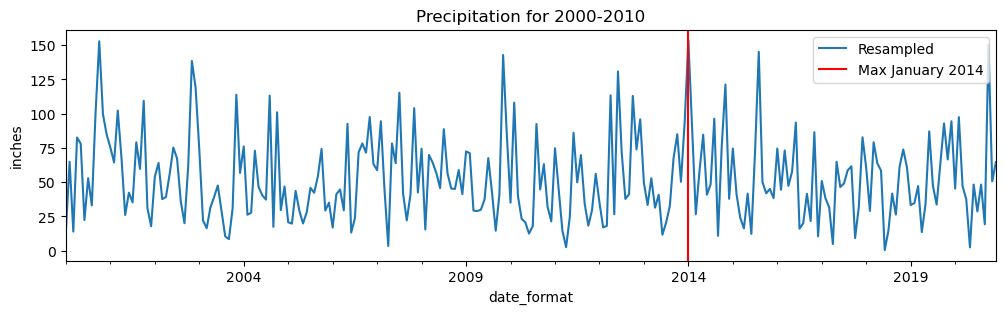

In [502]:
fig, ax = plt.subplots(figsize=(12,3))
q1_M.plot(ax=ax,title='Precipitation for 2000-2010')
#ax.xaxis.set_major_locator(fmt_months)
#ax.xaxis.set_major_formatter(loc_3months)
ax.axvline(max_date,color='red',label=f'Max {max_date.strftime(fmt)}');
ax.set_ylabel('inches')
ax.legend()

In [506]:
## creating our tick locators and formatters
## for minor month ticks
# create the locator to place ticks every 3 months.
loc_3months = mdates.MonthLocator(interval=3)
fmt_months = mdates.DateFormatter("%b")
## for major year ticks
loc_year = mdates.YearLocator()
fmt_year = mdates.DateFormatter("%Y")



## Question 1 A:
- January 2014 was the higest precipitation month.

## Question 2
- Which year between 2000-2020 had the coolest average temperature?


In [508]:
q2 = df.loc['2000':'2020',['mean_temp']]
q2

,mean_temp
date_format,
2000-01-01,7.0
2000-01-02,7.9
2000-01-03,9.4
2000-01-04,7.0
2000-01-05,6.4
...,...
2020-12-27,7.5
2020-12-28,1.1
2020-12-29,2.6


In [514]:
q2_Y = q2.resample('Y').mean()
q2_Y.name = 'Resampled'
q2_Y.tail()

,mean_temp
date_format,
2016-12-31,11.906284
2017-12-31,12.242466
2018-12-31,12.501370
2019-12-31,12.206164
2020-12-31,12.723634


In [515]:
cool_year = q2_Y.idxmin()
cool_year

mean_temp   2010-12-31
dtype: datetime64[ns]

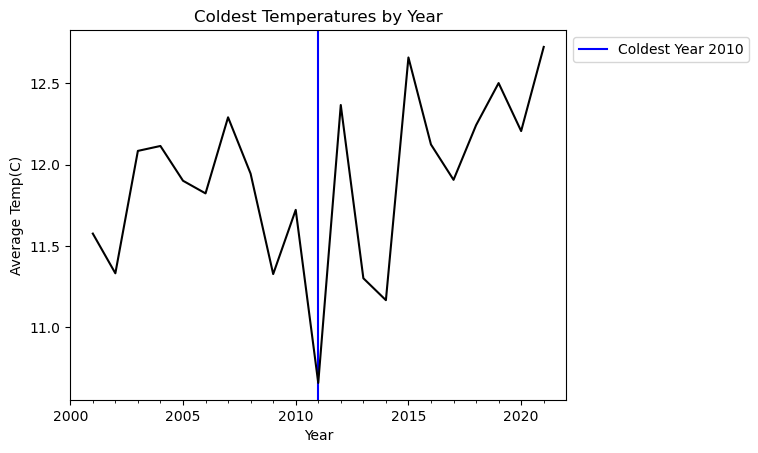

In [542]:
# Plot the coldest year
fig, ax = plt.subplots()
fmt = "%Y"
ax.axvline(cool_year, color='blue', label=f'Coldest Year {2010}');
ax.plot(q2_Y,color='black');
ax.xaxis.set_major_locator(mdates.YearLocator(5))
ax.xaxis.set_minor_locator(mdates.YearLocator(1))
ax.set_title('Coldest Temperatures by Year')
ax.set(xlabel='Year', ylabel='Average Temp(C)');
ax.legend(bbox_to_anchor=[1,1]);

## Q2 A:
- Coldest average year was 2010